In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv("Train_60/Train_60/Train_60/X_Train_Data_Input.csv")
Y = pd.read_csv("Train_60/Train_60/Train_60/Y_Train_Data_Target.csv")
X_test = pd.read_csv("Test_20\Test_20\Test_20\X_Test_Data_Input.csv")
Y_test = pd.read_csv("Test_20\Test_20\Test_20\Y_Test_Data_Target.csv")

In [4]:
X_train = X.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
Y_train = Y.iloc[:, 1]
Y_test = Y_test.iloc[:, 1]

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(785133, 22) (785133,) (261712, 22) (261712,)


In [8]:
X_train.isnull().sum()

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [9]:
X_test.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [6]:
X_train.nunique()

Column0         19
Column1       2564
Column2       9424
Column3         47
Column4         47
Column5     148334
Column6     157264
Column7     166513
Column8     355728
Column9      49650
Column10         2
Column11         2
Column12         2
Column13         2
Column14     42362
Column15     66302
Column16         3
Column17       153
Column18        11
Column19         2
Column20         2
Column21         2
dtype: int64

In [10]:
X_test.nunique()

Column0         19
Column1       2548
Column2       8913
Column3         47
Column4         47
Column5      59586
Column6      60716
Column7      68358
Column8     134980
Column9      16963
Column10         2
Column11         2
Column12         2
Column13         2
Column14     21948
Column15     24084
Column16         2
Column17       124
Column18        11
Column19         2
Column20         2
Column21         2
dtype: int64

In [29]:
Y_train.isnull().sum()

0

In [30]:
Y_test.isnull().sum()

0

In [11]:
# Fill NaN values with the mean for specific columns
columns_to_fill = ['Column0', 'Column3', 'Column4', 'Column5', 'Column6', 'Column8', 'Column9', 'Column14', 'Column15']

for col in columns_to_fill:
    X_train[col] = X_train[col].fillna(X_train[col].mean())
    X_test[col] = X_test[col].fillna(X_test[col].mean())

In [13]:
X_train.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [14]:
X_test.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64

In [15]:
plt.figure(figsize = (20, 50))
sns.heatmap(X_train.corr(), annot = True)

<Axes: >

<Axes: >

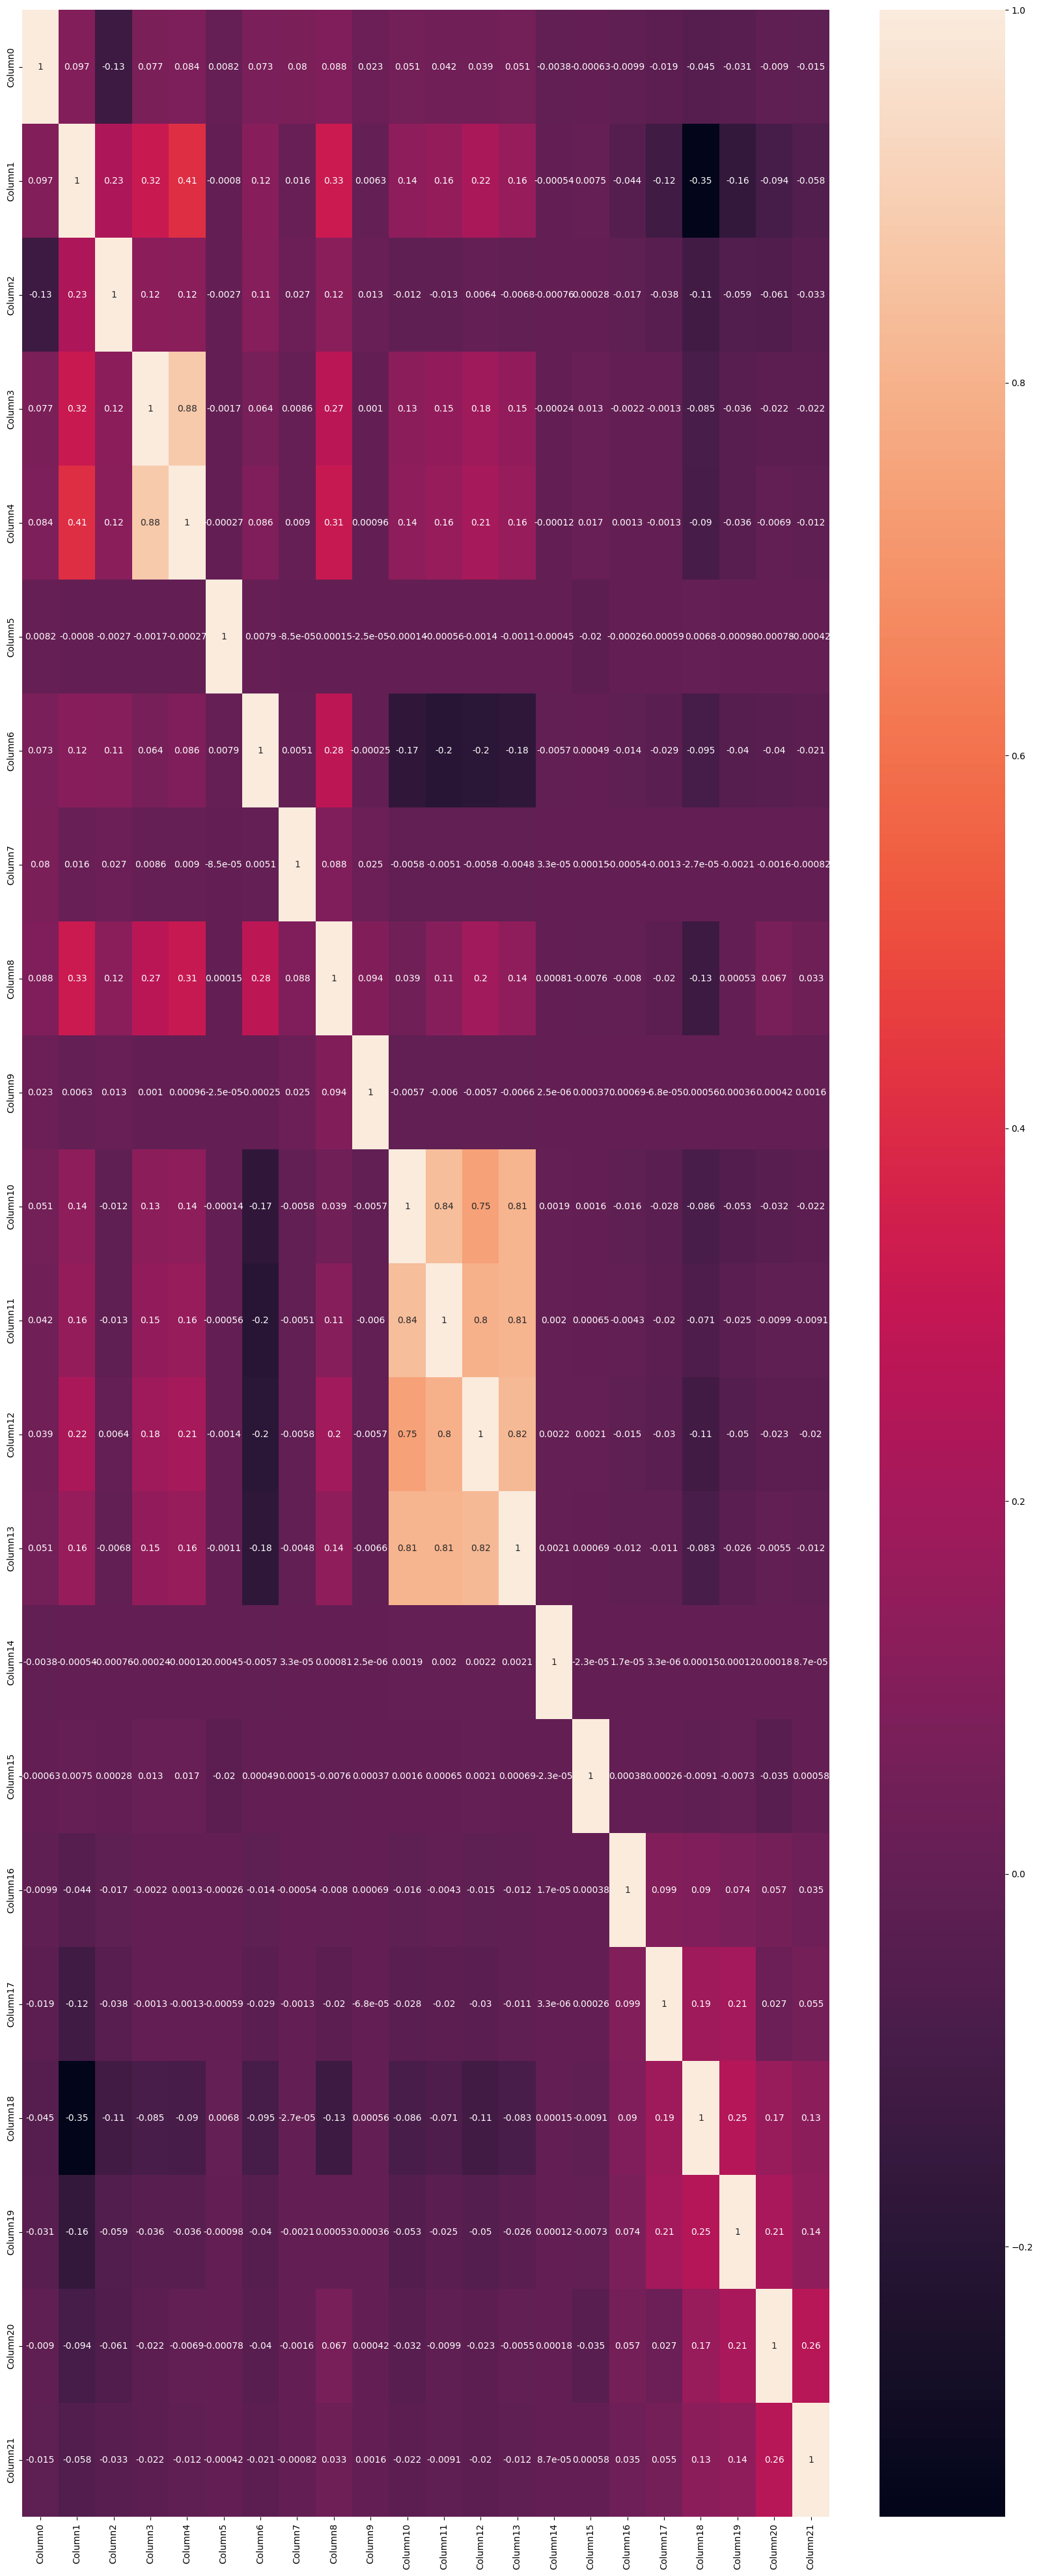

In [16]:
plt.figure(figsize = (20, 50))
sns.heatmap(X_test.corr(), annot = True)

In [17]:
import prince

# Select only the 4 correlated binary features
binary_features = X_train[['Column10', 'Column11', 'Column12', 'Column13']]
binary_features2 = X_test[['Column10', 'Column11', 'Column12', 'Column13']]
non_correlated_features = X_train.drop(binary_features, axis=1)
non_correlated_features2 = X_test.drop(binary_features2, axis=1)

# Apply MCA (you can specify the number of components you want)
mca = prince.MCA(n_components=2)
mca_transformed = mca.fit_transform(binary_features)
mca_transformed2 = mca.fit_transform(binary_features2)

# Add the transformed features back to the original dataset
X_train_mca = pd.concat([non_correlated_features, mca_transformed], axis=1)
X_test_mca = pd.concat([non_correlated_features2, mca_transformed2], axis=1)


In [18]:
X_train_mca.shape

(785133, 20)

In [19]:
X_test_mca.shape

(261712, 20)

In [20]:
X_train_mca.head()

Column0  Column1  Column2   Column3   Column4   Column5   Column6  \
0      2.0     2495   3726.0  0.678139  0.701403 -0.007468  0.434190   
1      0.0     2495   3454.0  0.452580  0.701403 -0.007468  1.554998   
2      2.0     2495   4543.0 -1.577453 -1.429540 -0.007469 -0.407939   
3      0.0      211     59.0 -0.000210 -0.000855 -0.000367 -0.407939   
4      0.0      718    950.0 -2.028572 -1.855728 -0.000367 -0.407939   

    Column7   Column8   Column9  Column14  Column15  Column16  Column17  \
0 -0.015603  0.606265  0.005245  0.001351   0.00339       0.0         0   
1 -0.015574  0.329946  0.005245  0.001351   0.00339       0.0         0   
2 -0.015607 -0.774979  0.005245  0.001351   0.00339       0.0         0   
3 -0.015607 -0.774979  0.005245 -0.000863   0.00339       0.0         0   
4 -0.015607 -0.774979  0.005245 -0.000863   0.00339       0.0         0   

   Column18  Column19  Column20  Column21         0         1  
0       0.0         0         0         0 -0.671913 -0.068404  
1       0.0         0         0         0 -0.671913 -0.068404  
2       0.0         0         0         0  1.505362 -0.149771  
3       1.0         0         0         0 -0.671913 -0.068404  
4       0.0         0         0         0 -0.671913 -0.068404

In [21]:
X_test_mca.head()

Column0  Column1  Column2   Column3   Column4   Column5   Column6  \
0      1.0     1986     53.0  0.678139  0.701403 -0.007469 -0.407939   
1      2.0     1579     12.0  0.678139  0.701403 -0.007468 -0.407939   
2      0.0      898   3817.0 -2.028572 -1.855728  0.000998 -0.407939   
3      0.0       79   3449.0 -0.675216 -0.577162 -0.007469  0.004020   
4      1.0      646   6510.0 -2.028572 -1.855728  0.000998 -0.407939   

    Column7   Column8   Column9  Column14  Column15  Column16  Column17  \
0 -0.015607  0.554860 -0.088554  0.001351   0.00339       0.0         0   
1 -0.015607  0.142149 -0.008717  0.001351   0.00339       0.0         0   
2 -0.015607 -0.774979 -0.008717  0.001313   0.00339       0.0         0   
3 -0.015607  0.635264 -0.008717  0.001351   0.00339       0.0         0   
4 -0.015434 -0.774979 -0.008717  0.001313   0.00339       0.0         0   

   Column18  Column19  Column20  Column21         0         1  
0       0.0         0         0         0  1.508989 -0.148991  
1       0.0         0         0         0  0.389758  0.336273  
2       0.0         0         0         0 -0.670259 -0.068044  
3       0.0         0         0         0  0.413757 -0.124905  
4       0.0         0         0         0  1.508989 -0.148991

In [22]:
from sklearn.decomposition import PCA

correlated_features = ['Column3', 'Column4']
non_correlated_features = X_train_mca.drop(correlated_features, axis=1)
non_correlated_features2 = X_test_mca.drop(correlated_features, axis=1)


pca = PCA(n_components=1)  # Keep 2 principal components for the 4 correlated features
pca_transformed = pca.fit_transform(X_train_mca[correlated_features])
pca_transformed2 = pca.fit_transform(X_test_mca[correlated_features])

# Concatenate the PCA transformed features with the rest of the dataset
X_train_final = pd.concat([non_correlated_features, pd.DataFrame(pca_transformed)], axis=1)
X_test_final = pd.concat([non_correlated_features2, pd.DataFrame(pca_transformed2)], axis=1)

In [24]:
X_train_final.head()

Column0  Column1  Column2   Column5   Column6   Column7   Column8  \
0      2.0     2495   3726.0 -0.007468  0.434190 -0.015603  0.606265   
1      0.0     2495   3454.0 -0.007468  1.554998 -0.015574  0.329946   
2      2.0     2495   4543.0 -0.007469 -0.407939 -0.015607 -0.774979   
3      0.0      211     59.0 -0.000367 -0.407939 -0.015607 -0.774979   
4      0.0      718    950.0 -0.000367 -0.407939 -0.015607 -0.774979   

    Column9  Column14  Column15  Column16  Column17  Column18  Column19  \
0  0.005245  0.001351   0.00339       0.0         0       0.0         0   
1  0.005245  0.001351   0.00339       0.0         0       0.0         0   
2  0.005245  0.001351   0.00339       0.0         0       0.0         0   
3  0.005245 -0.000863   0.00339       0.0         0       1.0         0   
4  0.005245 -0.000863   0.00339       0.0         0       0.0         0   

   Column20  Column21         0         1             0  
0         0         0 -0.671913 -0.068404  9.762306e-01  
1         0         0 -0.671913 -0.068404  8.166770e-01  
2         0         0  1.505362 -0.149771 -2.125551e+00  
3         0         0 -0.671913 -0.068404 -3.252607e-19  
4         0         0 -0.671913 -0.068404 -2.745908e+00

In [25]:
X_test_final.head()

Column0  Column1  Column2   Column5   Column6   Column7   Column8  \
0      1.0     1986     53.0 -0.007469 -0.407939 -0.015607  0.554860   
1      2.0     1579     12.0 -0.007468 -0.407939 -0.015607  0.142149   
2      0.0      898   3817.0  0.000998 -0.407939 -0.015607 -0.774979   
3      0.0       79   3449.0 -0.007469  0.004020 -0.015607  0.635264   
4      1.0      646   6510.0  0.000998 -0.407939 -0.015434 -0.774979   

    Column9  Column14  Column15  Column16  Column17  Column18  Column19  \
0 -0.088554  0.001351   0.00339       0.0         0       0.0         0   
1 -0.008717  0.001351   0.00339       0.0         0       0.0         0   
2 -0.008717  0.001313   0.00339       0.0         0       0.0         0   
3 -0.008717  0.001351   0.00339       0.0         0       0.0         0   
4 -0.008717  0.001313   0.00339       0.0         0       0.0         0   

   Column20  Column21         0         1         0  
0         0         0  1.508989 -0.148991  0.972702  
1         0         0  0.389758  0.336273  0.972702  
2         0         0 -0.670259 -0.068044 -2.749481  
3         0         0  0.413757 -0.124905 -0.888389  
4         0         0  1.508989 -0.148991 -2.749481

In [26]:
plt.figure(figsize = (20, 50))
sns.heatmap(X_train_final.corr(), annot = True)

<Axes: >

<Axes: >

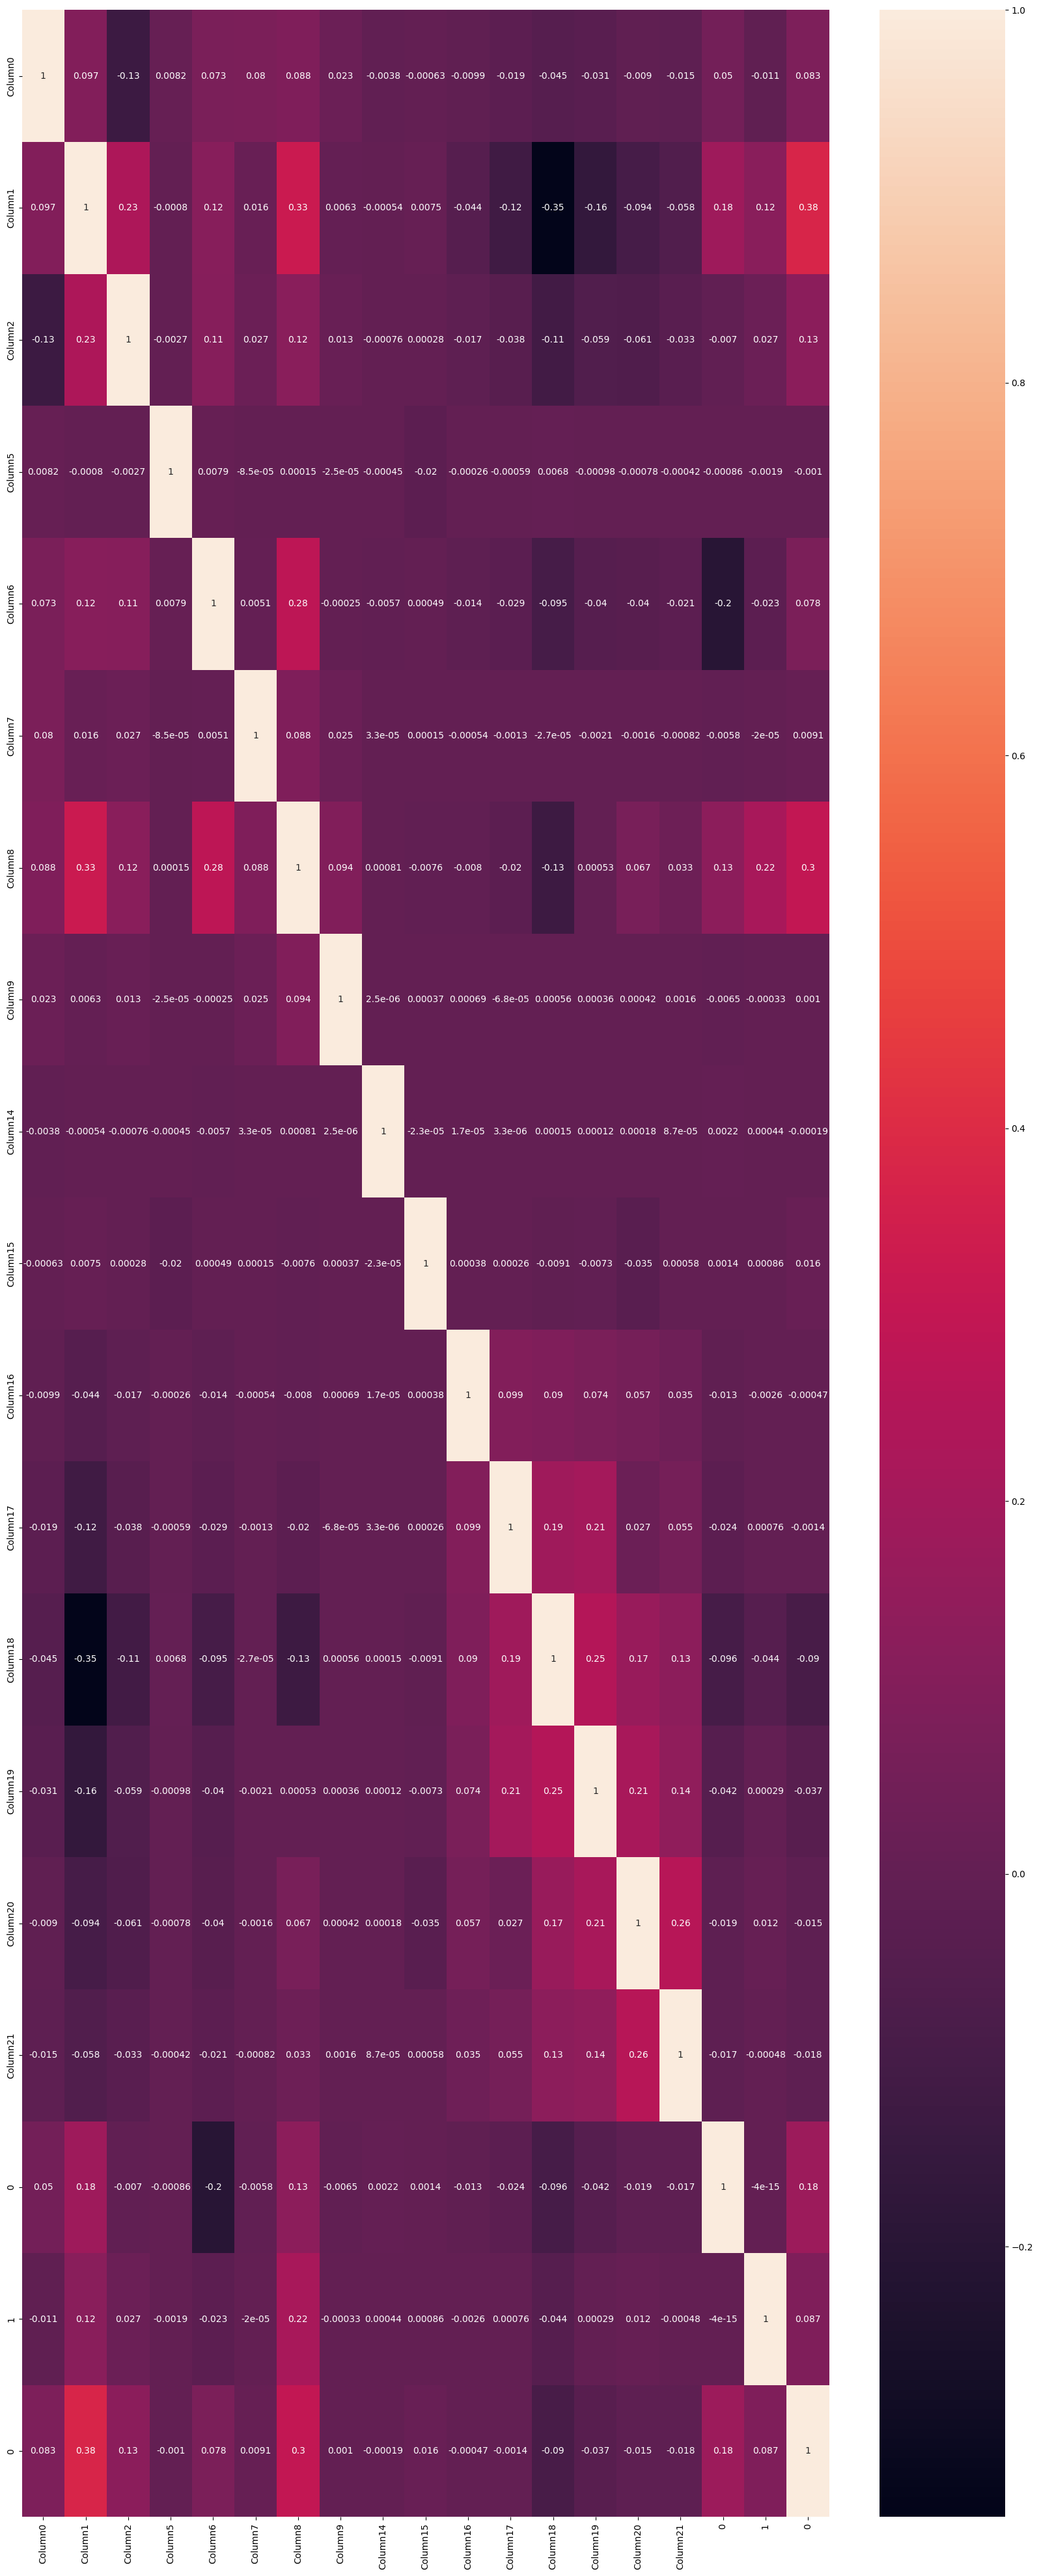

In [27]:
plt.figure(figsize = (20, 50))
sns.heatmap(X_test_final.corr(), annot = True)

In [28]:
X_train_final.to_csv('X_train_final.csv', index=False)
X_test_final.to_csv('X_test_final.csv', index=False)